# CAPITAL ASSET PRICING MODEL (CAPM)

## WHAT IS CAPM?
***Capital Assets Pricing Model (CAPM) is one of the most important models in Finance.***

***CAPM is a model that describes the relationship between the expected return and risk of securities.***

***CAPM indicates that the expected return on a security is equal to the risk-free return plus a risk premium.***

## RISK FREE ASSET ($r_p$)

*   ***CAPM assumes that there exist a risk free asset with zero
standard deviation.***
*   ***The risk free asset return is denoted as $r_f$.***
*   ***Investors who are extremely risk averse would prefer to buy the risk free asset to protect their money and earn a low return $r_f$***
*   ***If investors are interested in gaining more return, they have to bear more risk compared to the risk free asset.***
*   ***A risk free asset could be a U.S. government 10 year Treasury bill. This is technically a risk free asset since it's backed by the US Government.***



## MARKET PORTFOLIO ($r_m$)
*   ***Market portfolio includes all securities in the market. A good representation of the market portfolio is the S&P500 (Standard & Poor's 500 Index).***
*   ***The market overall return is denoted as $r_m$.***
*   ***The S&P500 is a market-capitalization-weighted index of the 500 largest U.S. publicly traded companies.***
*   ***The index is viewed as a gauge of large-cap U.S. equities.***



## WHAT IS BETA?
Let's compare the market portfolio (S&P500) with other stocks
during the recession of 2020.

On March 16, 2020 the S&P 500 experienced a drop of -11.9%
while AT&T only dropped -7.7% and Boeing dropped -23.8%. AT&T was less volatile compared to the market. However, Boeing was more volatile compared to the market.

* ***Beta represents the slope of the line regression line(market return vs. stock return).*** 
* ***Beta is a measure of the volatility or systematic risk of a security or portfolio compared to the entire market (S&P500).***
* ***Beta is used in the CAPM and describes the relationship between systematic risk and expected return for assets.***
* ***Tech stocks generally have higher betas than S&P500 but they also have excess returns.***
 *  ***Beta=1.0, this indicates that its price activity is strongly correlated with the market.***
 * ***Beta<1(defensive):indicates that the security is theoretically less volatile than the market (Ex:Utility and consumer goods (P&G). If the stock is included, this will make the portfolio less risky compared to the same portfolio without the stock.***
 * ***Beta>1 (aggressive): indicates that the security's priceis more volatile than the market. For instance, Tesla stock beta is 1.26 indicating that it's 26% more volatile than the market. It will do better if the economy is booming and worse in cases of recession.***


## CAPM FORMULA

\begin{align}
    r_i = r_f \,+ \,B_i(r_m\,-\,r_f)
\end{align}

Where:

* $r_i$ EXPECTED RETURN OF A SECURITY
* $r_f$ RISK FREE RATE OF RETURN
* $B_i$ BETA BETWEEN THE STOCK AND THE MARKET
* $(r_m\,-\,r_f)$ RISK PREMIUM (INCENTIVE FOR INVESTING IN A RISKY SECURITY)

### example
The CAPM formula for Apple Stock can be calculated as follows:
* $r_f$ = 0% (yield from a 10 years US government bond could also be used)
* $r_m$ = 12.4% (S&P500 rate of return)
* $B_{APPL}$ = 1.11

\begin{align}
    r_{APPL} = r_f \,+ \,B_{APPL}(r_m\,-\,r_f)
\end{align}

Expected return for Apple stock = $r_{appL}$ = 0% + 1.11(12.4% - 0%) = 13.7%

$r_{APLL}$ = 13.7%

**"If an investor intends to invest in Apple stock, he/she should expect 13.7% return in order to be compensated for the risk they are taking"**

## IMPORT DATASETS AND LIBRARIES

In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [ ]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
# Read the stock data csv file, here's the list of the stocks considered:

# AAPL = Apple Stock 
# BA = Boeing 
# T = AT&T
# MGM = MGM Resorts International (Hotel Industry)
# AMZN = Amazon
# IBM = IBM
# TSLA = Tesla Motors
# GOOG = Google 
# sp500 = US Stock Market (S&P 500 is a stock market index that measures the stock performance of 500 large companies listed on U.S. stock exchange)
# Check the list of S&P 500 companies here: https://en.wikipedia.org/wiki/List_of_S%26P_500_companies

stocks_df = pd.read_csv('/content/drive/MyDrive/my files/Financial Analysis/stock.csv')
stocks_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [ ]:
# Sort the stock data by date
stocks_df = stocks_df.sort_values(by = ['Date'])
stocks_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [ ]:
# Print out the number of stocks
print('Total Number of stocks : {}'.format(len(stocks_df.columns[1:])))

Total Number of stocks : 9


In [ ]:
# Print the name of stocks
print('Stocks under consideration are:')

for i in stocks_df.columns[1:]:
  print(i)

Stocks under consideration are:
AAPL
BA
T
MGM
AMZN
IBM
TSLA
GOOG
sp500


In [ ]:
stocks_df.describe()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000
mean,140.819823,189.942700,35.162899,23.105743,915.665665,161.853001,259.600815,783.712512,2218.749554
std,70.827601,103.678586,3.207490,6.963847,697.838905,25.561938,210.988003,334.448057,537.321727
min,55.790001,67.239998,26.770000,7.140000,175.929993,94.769997,22.790001,278.481171,1278.040039
25%,89.165714,124.015000,33.040001,18.545000,316.490005,142.769997,184.595001,527.214416,1847.984985
50%,116.599998,142.419998,34.930000,23.780001,676.010010,156.949997,231.960007,737.599976,2106.629883
75%,175.019997,297.044998,37.419998,28.430000,1593.645019,185.974998,307.350006,1079.744995,2705.810059
max,455.609985,440.619995,43.470001,38.029999,3225.000000,215.800003,1643.000000,1568.489990,3386.149902


In [ ]:
# Check if data contains any null values
stocks_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [ ]:
# Getting dataframe info
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 185.5+ KB


## PLOT THE DATA

In [ ]:
# Define a function to plot the entire dataframe
# The function takes in a dataframe df as an input argument and does not return anything back!
# The function performs data visualization
# Pandas works great with matplotlib, you can simply plot data directly from a Pandas DataFrame using plot() method

def show_plot(df, fig_title):
  df.plot(x = 'Date', figsize = (15,7), linewidth = 3, title = fig_title)
  plt.grid()
  plt.show()

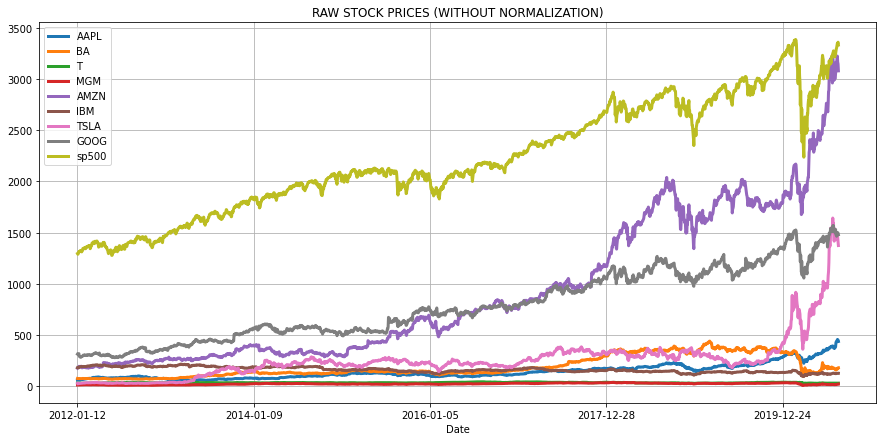

In [ ]:
# Plot the data
show_plot(stocks_df, 'RAW STOCK PRICES (WITHOUT NORMALIZATION)')

Print out normalized (scaled) stock prices

In [ ]:
def normalize(df):
    x = df.copy()
    for i in x.columns[1:]:
        x[i] = x[i]/x[i][0]
    return x

In [ ]:
normalize(stocks_df)

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2012-01-13,0.996251,0.987949,0.998340,1.018137,1.014153,0.992301,0.806726,0.992615,0.995052
2,2012-01-17,1.007855,0.996424,1.004316,1.009893,1.032570,0.996954,0.941593,0.998317,0.998587
3,2012-01-18,1.018320,0.994040,1.006972,1.049464,1.076792,1.002880,0.949027,1.005193,1.009680
4,2012-01-19,1.015093,1.000662,1.009960,1.055235,1.105269,0.999834,0.947257,1.015771,1.014666
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,7.313297,2.308039,0.991036,1.378401,18.217644,0.694821,52.567080,4.698347,2.568715
2155,2020-08-06,7.568452,2.280493,0.990704,1.521847,18.331155,0.698532,52.728494,4.782805,2.585226
2156,2020-08-07,7.383066,2.251622,0.996680,1.568838,18.004093,0.692107,51.423361,4.764919,2.586862
2157,2020-08-10,7.490377,2.375977,1.002656,1.784831,17.894390,0.704016,50.214865,4.770052,2.593956


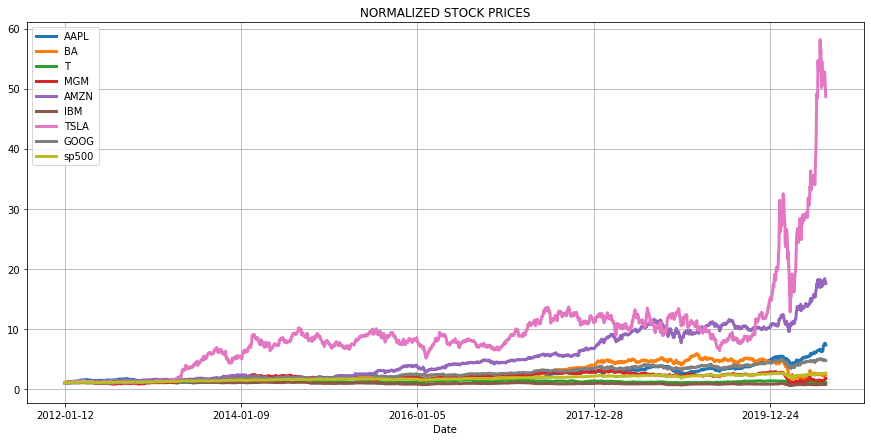

In [ ]:
show_plot(normalize(stocks_df), 'NORMALIZED STOCK PRICES')

## CALCULATE MULTIPLE STOCKS DAILY RETURNS


\begin{align}
Daily\,Stock\,Return = \frac{Today\,Price- Yesterday\,Price}{Yesterday\,Price}*100
\end{align}

In [ ]:
# Let's define a function to calculate stocks daily returns (for all stocks) 
def daily_return(df):
  df_daily_return = df.copy()

  # Loop through each stock (while ignoring time columns with index 0)
  for i in df.columns[1:]:
    
    # Loop through each row belonging to the stock
    for j in range(1, len(df)):

      # Calculate the percentage of change from the previous day
      df_daily_return[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) * 100
    
    # set the value of first row to zero since the previous value is not available
    df_daily_return[i][0] = 0
  
  return df_daily_return

In [ ]:
# Get the daily returns 
stocks_daily_return = daily_return(stocks_df)
stocks_daily_return

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2012-01-13,-0.374946,-1.205144,-0.166006,1.813685,1.415339,-0.769869,-19.327430,-0.738516,-0.494792
2,2012-01-17,1.164812,0.857909,0.598603,-0.809717,1.815943,0.468852,16.717854,0.574410,0.355295
3,2012-01-18,1.038382,-0.239234,0.264463,3.918367,4.282725,0.594448,0.789470,0.688856,1.110793
4,2012-01-19,-0.316937,0.666134,0.296736,0.549882,2.644634,-0.303752,-0.186494,1.052283,0.493866
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,0.362467,5.579446,-0.533156,0.000000,2.109065,-0.309917,-0.133153,0.589774,0.642974
2155,2020-08-06,3.488923,-1.193483,-0.033501,10.406699,0.623082,0.534082,0.307062,1.797626,0.642770
2156,2020-08-07,-2.449458,-1.265966,0.603217,3.087768,-1.784187,-0.919762,-2.475194,-0.373974,0.063303
2157,2020-08-10,1.453480,5.522880,0.599604,13.767729,-0.609323,1.720552,-2.350092,0.107728,0.274222


In [ ]:
stocks_daily_return.mean()

AAPL     0.107695
BA       0.065907
T        0.008159
MGM      0.064662
AMZN     0.151122
IBM     -0.006091
TSLA     0.238398
GOOG     0.084392
sp500    0.049316
dtype: float64

Plot the returns vs. time using both static and interactive plots

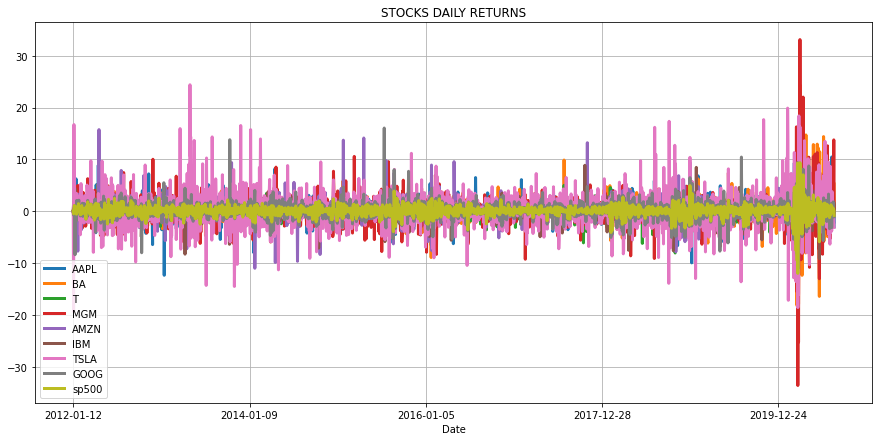

In [ ]:
# Plot the daily returns
# Notice huge drops in MGM around March 2020 (Pandemic effect)
show_plot(stocks_daily_return, 'STOCKS DAILY RETURNS')

In [ ]:
# Plot the interactive chart
# Zoom in to view the sharp decline during March 2020
interactive_plot(stocks_daily_return, 'STOCKS DAILY RETURNS')

## CALCULATE BETA FOR A SINGLE STOCK

In [ ]:
# Select any stock, let's say Apple 
stocks_daily_return['AAPL']

0       0.000000
1      -0.374946
2       1.164812
3       1.038382
4      -0.316937
          ...   
2154    0.362467
2155    3.488923
2156   -2.449458
2157    1.453480
2158   -2.973987
Name: AAPL, Length: 2159, dtype: float64

In [ ]:
# Select the S&P500 (Market)
stocks_daily_return['sp500']

0       0.000000
1      -0.494792
2       0.355295
3       1.110793
4       0.493866
          ...   
2154    0.642974
2155    0.642770
2156    0.063303
2157    0.274222
2158   -0.796913
Name: sp500, Length: 2159, dtype: float64

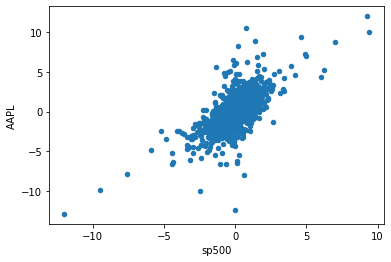

In [ ]:
# plot a scatter plot between the selected stock and the S&P500 (Market)
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'AAPL')

In [ ]:
# Fit a polynomial between the selected stock and the S&P500 (Poly with order = 1 is a straight line)

# beta represents the slope of the line regression line (market return vs. stock return). 
# Beta is a measure of the volatility or systematic risk of a security or portfolio compared to the entire market (S&P500) 
# Beta is used in the CAPM and describes the relationship between systematic risk and expected return for assets 

# Beta = 1.0, this indicates that its price activity is strongly correlated with the market. 
# Beta < 1, indicates that the security is theoretically less volatile than the market (Ex: Utility stocks). If the stock is included, this will make the portfolio less risky compared to the same portfolio without the stock.
# Beta > 1, indicates that the security's price is more volatile than the market. For instance, Tesla stock beta is 1.26 indicating that it's 26% more volatile than the market. 
# Tech stocks generally have higher betas than S&P500 but they also have excess returns
# MGM is 65% more volatile than the S&P500!


beta, alpha = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return['AAPL'], 1)
print('Beta for {} stock is = {} and alpha is = {}'.format('AAPL', beta, alpha))  

Beta for AAPL stock is = 1.1128924148678097 and alpha is = 0.052812084694402905


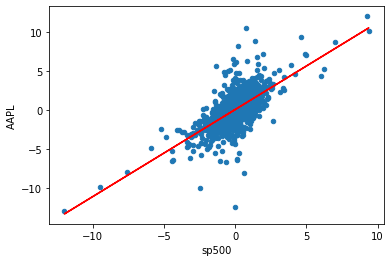

In [ ]:
# Now let's plot the scatter plot and the straight line on one plot
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'AAPL')

# Straight line equation with alpha and beta parameters 
# Straight line equation is y = beta * rm + alpha
plt.plot(stocks_daily_return['sp500'], beta * stocks_daily_return['sp500'] + alpha, '-', color = 'r')


## APPLY THE CAPM FORMULA TO AN INDIVIDUAL STOCK

In [ ]:
# Let's calculate the annualized rate of return for S&P500 
# Note that out of 365 days/year, stock exchanges are closed for 104 days during weekend days (Saturday and Sunday) 
# Check your answers with: https://dqydj.com/sp-500-return-calculator/
rm = stocks_daily_return['sp500'].mean() * 252
rm

12.42763366329808

In [ ]:
# Assume risk free rate is zero
# Also you can use the yield of a 10-years U.S. Government bond as a risk free rate
rf = 0 

# Calculate return for any security (APPL) using CAPM  
ER_AAPL = rf + ( beta * (rm-rf) ) 

In [ ]:
ER_AAPL

13.830619238640283

## CALCULATE BETA FOR ALL STOCKS

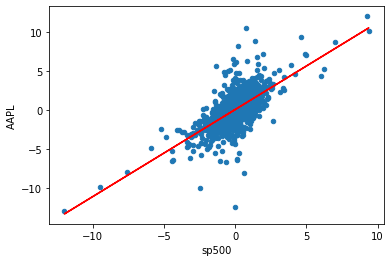

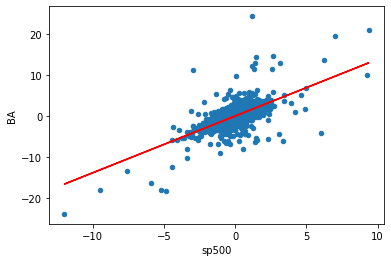

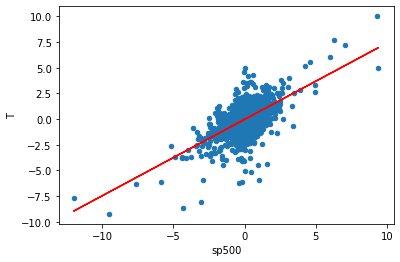

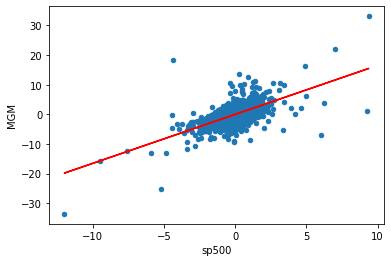

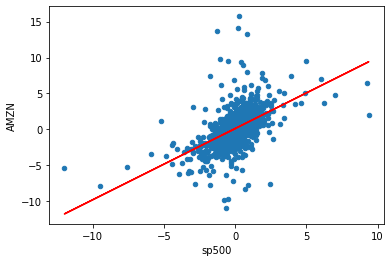

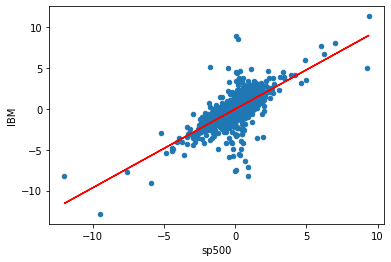

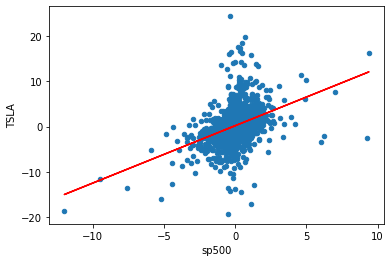

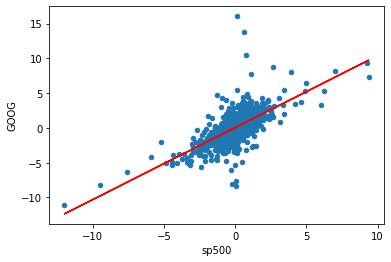

In [ ]:
# Let's create a placeholder for all betas and alphas (empty dictionaries)
beta = {}
alpha = {}

# Loop on every stock daily return
for i in stocks_daily_return.columns:

  # Ignoring the date and S&P500 Columns 
  if i != 'Date' and i != 'sp500':
    # plot a scatter plot between each individual stock and the S&P500 (Market)
    stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = i)
    
    # Fit a polynomial between each stock and the S&P500 (Poly with order = 1 is a straight line)
    b, a = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return[i], 1)
    
    plt.plot(stocks_daily_return['sp500'], b * stocks_daily_return['sp500'] + a, '-', color = 'r')
    
    beta[i] = b
    
    alpha[i] = a
    
    plt.show()

interactive plot

In [ ]:
# Let's do the same plots but in an interactive way
# Explore some wierd points in the dataset: Tesla stock return was at 24% when the S&P500 return was -0.3%!

for i in stocks_daily_return.columns:
  
  if i != 'Date' and i != 'sp500':
    
    # Use plotly express to plot the scatter plot for every stock vs. the S&P500
    fig = px.scatter(stocks_daily_return, x = 'sp500', y = i, title = i)

    # Fit a straight line to the data and obtain beta and alpha
    b, a = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return[i], 1)
    
    # Plot the straight line 
    fig.add_scatter(x = stocks_daily_return['sp500'], y = b*stocks_daily_return['sp500'] + a)
    fig.show()

In [ ]:
# Let's view Beta for every stock 
beta

{'AAPL': 1.1128924148678097,
 'AMZN': 0.9917345712576846,
 'BA': 1.3828672010892775,
 'GOOG': 1.0348817687428562,
 'IBM': 0.9604149148095246,
 'MGM': 1.653567706518011,
 'T': 0.7446293454747844,
 'TSLA': 1.2686150101095903}

In [ ]:
# Let's view alpha for each of the stocks
# Alpha describes the strategy's ability to beat the market (S&P500)
# Alpha indicates the “excess return” or “abnormal rate of return,” 
# A positive 0.175 alpha for Tesla means that the portfolio’s return exceeded the benchmark S&P500 index by 17%.

alpha

{'AAPL': 0.052812084694402905,
 'AMZN': 0.1022139641776522,
 'BA': -0.0022906983297531543,
 'GOOG': 0.03335558721467016,
 'IBM': -0.05345494150445116,
 'MGM': -0.016885305520478674,
 'T': -0.028563430198461616,
 'TSLA': 0.17583492165165812}

## APPLY CAPM FORMULA TO CALCULATE THE RETURN FOR THE PORTFOLIO

In [ ]:
# Obtain a list of all stock names
keys = list(beta.keys())
keys

['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG']

In [ ]:
# Define the expected return dictionary
ER = {}

rf = 0 # assume risk free rate is zero in this case
rm = stocks_daily_return['sp500'].mean() * 252 # this is the expected return of the market 
rm

12.42763366329808

In [ ]:
for i in tqdm(keys):
  # Calculate return for every security using CAPM  
  ER[i] = rf + ( beta[i] * (rm-rf) ) 

  0%|          | 0/8 [00:00<?, ?it/s]

In [ ]:
for i in keys:
  print('Expected Return Based on CAPM for {} is {}%'.format(i, ER[i]))

Expected Return Based on CAPM for AAPL is 13.830619238640283%
Expected Return Based on CAPM for BA is 17.1857669801279%
Expected Return Based on CAPM for T is 9.253980720502046%
Expected Return Based on CAPM for MGM is 20.54993369406583%
Expected Return Based on CAPM for AMZN is 12.324913942818489%
Expected Return Based on CAPM for IBM is 11.935684726020405%
Expected Return Based on CAPM for TSLA is 15.765882605403178%
Expected Return Based on CAPM for GOOG is 12.861131506762177%


In [ ]:
# Assume equal weights in the portfolio
portfolio_weights = 1/8 * np.ones(8) 
portfolio_weights

array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

In [ ]:
# Calculate the portfolio return 
ER_portfolio = sum(list(ER.values()) * portfolio_weights)
ER_portfolio

14.213489176792537

In [ ]:
print('Expected Return Based on CAPM for the portfolio is {}%\n'.format(ER_portfolio))

Expected Return Based on CAPM for the portfolio is 14.213489176792537%

